# load mmm sample

In [1]:
%include "EnableIPythonDisplay.swift"

import PythonKit
import Foundation

let np = Python.import("numpy")
let plt = Python.import("matplotlib.pyplot")
IPythonDisplay.shell.enable_matplotlib("inline")

%include "Sources/MotionDataset/MotionFrame.swift"
%include "Sources/MotionDataset/MotionSample.swift"
%include "Sources/MotionDataset/MotionDataset.swift"

In [2]:
// TODO: create class that loads dataset and converts it
// TODO: create api for saving the image

In [3]:
let mmmURL = URL(fileURLWithPath: "/notebooks/m2l.gt/data/2017-06-22/00003_mmm.xml")
let annotationsURL = URL(fileURLWithPath: "/notebooks/m2l.gt/data/2017-06-22/00003_annotations.json")
let motionSample = MotionSample(mmmURL: mmmURL, annotationsURL: annotationsURL)
print(motionSample.describe())

MotionSample(timestamp: 5.68, motions: 569, annotations: 1)


In [4]:
print(motionSample.annotations)

["A human walking"]


# visualize sample

In [5]:
let time = np.array(motionSample.motionFrames.map {$0.timestamp})
let position = np.array(motionSample.motionFrames.map {$0.jointPositions})

In [6]:
position.shape

(569, 45)


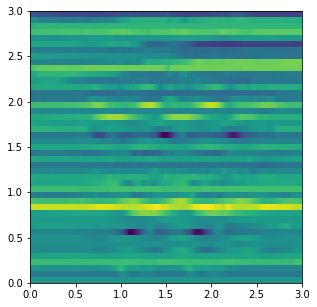

None


In [7]:
plt.figure(figsize: [5, 5])
plt.imshow(position.T, interpolation: "nearest", extent: [0, 3, 0, 3], cmap: "viridis")
plt.show()

# group joints into sections of skeleton

In [8]:
let groupedPosition = np.array(motionSample.motionFrames.map {$0.grouppedJointPositions()})

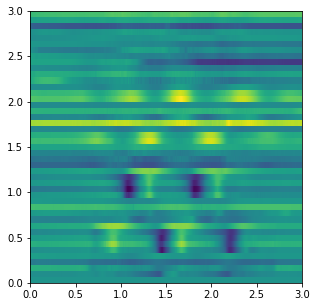

None


In [9]:
plt.figure(figsize: [5, 5])
plt.imshow(groupedPosition.T, interpolation: "nearest", extent: [0, 3, 0, 3], cmap: "viridis")
plt.show()